<a href="https://colab.research.google.com/github/amar-pandit/house-price-production/blob/main/House%20Price%20Prediction%20using%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                📌 Title

                                  House Price Prediction using Machine Learning

📌 Introduction

Objective:
The goal of this project is to build a regression-based machine learning model to predict house prices using historical housing data. The project focuses on data cleaning, exploratory data analysis (EDA), feature engineering, model comparison, and evaluation.

📌 Dataset Description

Source: Kaggle – House Price Prediction Dataset

Target Variable: price

Features include numerical and categorical attributes such as area, bedrooms, bathrooms, and location-related variables.

📌 Steps Covered

Data Loading

Data Cleaning

Exploratory Data Analysis (EDA)

Feature Engineering

Encoding & Transformation

Model Training

Model Comparison

Evaluation Metrics

Residual Analysis

Model Saving & Prediction

#STEP 1: IMPORT REQUIRED LIBRARIES

In [ ]:

# Numerical operations
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings for clean output
import warnings
warnings.filterwarnings("ignore")


STEP 2: LOAD DATASET

In [ ]:
# Load CSV file
df = pd.read_csv("/content/data.csv")  # change file name if needed

# Display first 5 rows
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


STEP 3: BASIC DATA EXPLORATION

In [ ]:
# Check number of rows and columns
df.shape


(4600, 18)

In [ ]:
# Check data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
# Statistical summary of numerical columns
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


STEP 4: CHECK MISSING VALUES

In [ ]:
# Count missing values in each column
df.isnull().sum()


,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
# Percentage of missing values
(df.isnull().sum() / len(df)) * 100


,0
date,0.0
price,0.0
bedrooms,0.0
bathrooms,0.0
sqft_living,0.0
sqft_lot,0.0
floors,0.0
waterfront,0.0
view,0.0
condition,0.0


STEP 5: HANDLE MISSING VALUES

In [ ]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns


In [ ]:
# Fill missing numerical values with mean
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
# Fill missing categorical values with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Verify missing values are removed
df.isnull().sum()


,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


STEP 6: DATA VISUALIZATION (4 PLOTS)

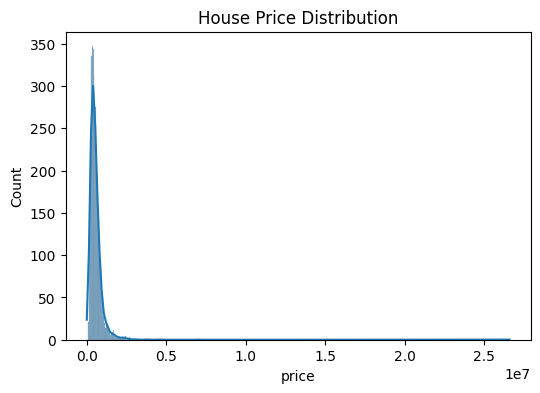

In [ ]:
# Histogram - Price distribution
plt.figure(figsize=(6,4))
sns.histplot(df['price'], kde=True)
plt.title("House Price Distribution")
plt.show()


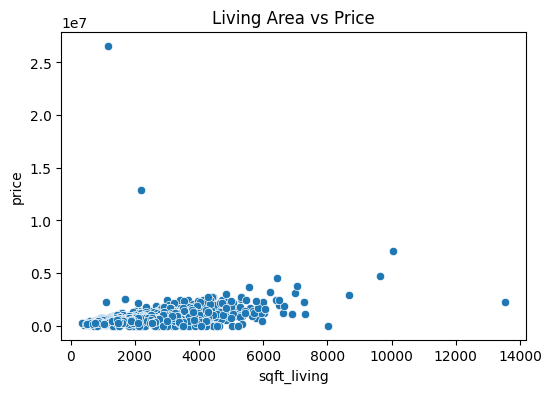

In [ ]:
# Scatter plot - Area vs Price
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['area'], y=df['price'])
plt.title("Area vs Price")
plt.show()


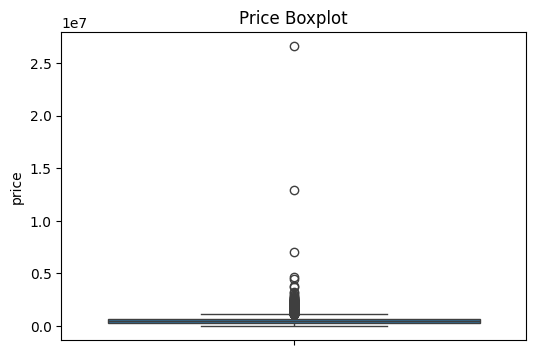

In [ ]:
# Boxplot - Price outliers
plt.figure(figsize=(6,4))
sns.boxplot(y=df['price'])
plt.title("Price Boxplot")
plt.show()


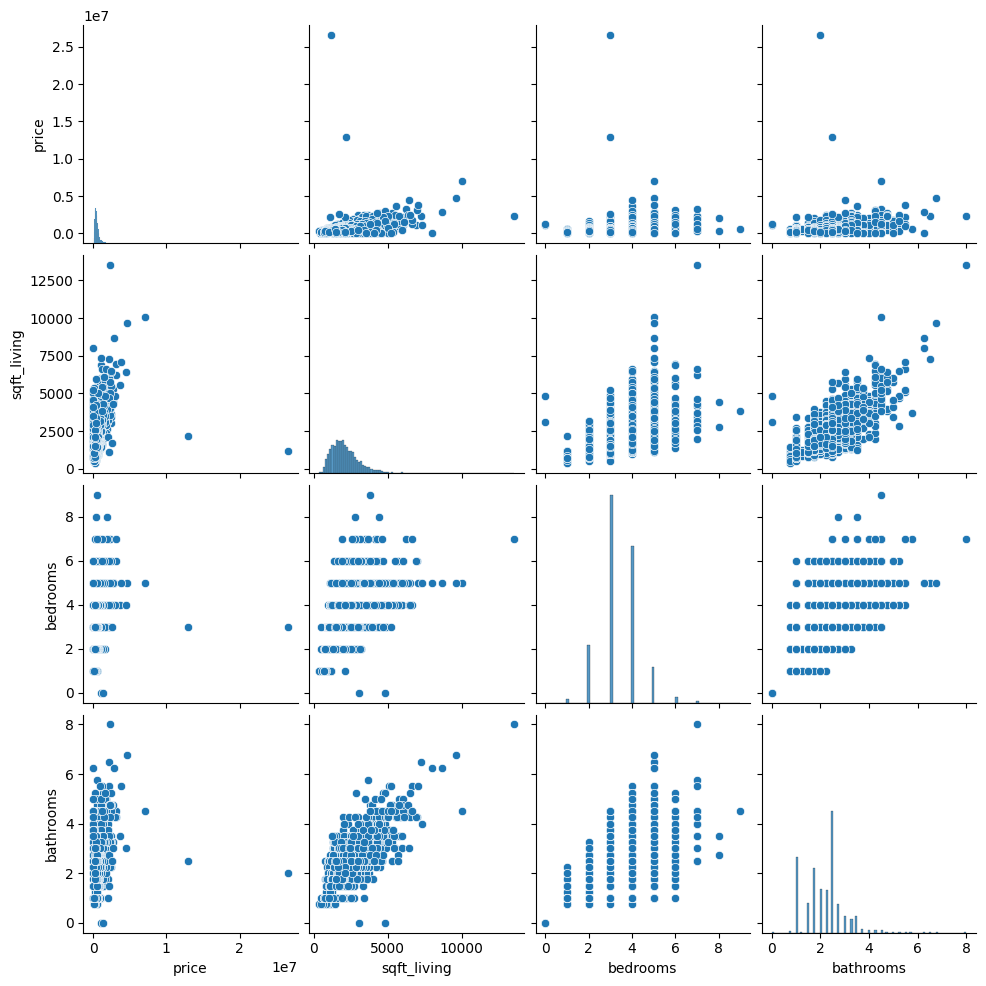

In [ ]:
# Pairplot - Feature relationships
sns.pairplot(df[['price', 'sqft_living', 'bedrooms', 'bathrooms']])

STEP 7: FEATURE ENGINEERING

In [ ]:
# Log transformation to reduce skewness
df['price_log'] = np.log1p(df['price'])


STEP 8: ENCODE CATEGORICAL VARIABLES

In [ ]:
# One-hot encoding
df = pd.get_dummies(df, drop_first=True)


STEP 9: TRAIN-TEST SPLIT


In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(['price', 'price_log'], axis=1)
y = df['price_log']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


STEP 10: MODEL TRAINING & EVALUATION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Metrics
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

rmse_lr, mae_lr


(np.float64(1.3895567224532193), 0.443791709064374)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

rmse_rf, mae_rf


(np.float64(1.3999297356935583), 0.33260185184090996)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train model
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

# Predictions
y_pred_gb = gb.predict(X_test)

# Metrics
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)

rmse_gb, mae_gb


(np.float64(1.4036907827876761), 0.4773059864541498)

STEP 11: RESIDUAL ANALYSIS

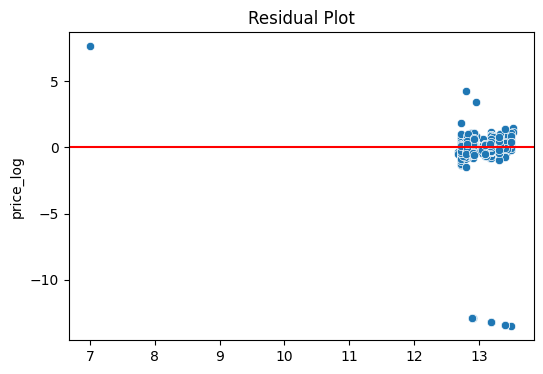

In [ ]:
# Residual calculation
residuals = y_test - y_pred_gb

# Residual plot
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_gb, y=residuals)
plt.axhline(0, color='red')
plt.title("Residual Plot")
plt.show()


STEP 12: SAVE TRAINED MODEL

In [ ]:
import joblib

# Save the best model
joblib.dump(gb, "house_price_model.pkl")


['house_price_model.pkl']

STEP 13: MODEL PREDICTION EXAMPLE

In [ ]:
# Load saved model
model = joblib.load("house_price_model.pkl")

# Take one sample input
sample_input = X_test.iloc[0:1]

# Predict log price
log_prediction = model.predict(sample_input)

# Convert back to actual price
final_price = np.expm1(log_prediction)

final_price


array([369416.92376843])

EXTRA 1: Correlation Heatmap (Advanced EDA)

Purpose: Shows relationships between features and the target variable.

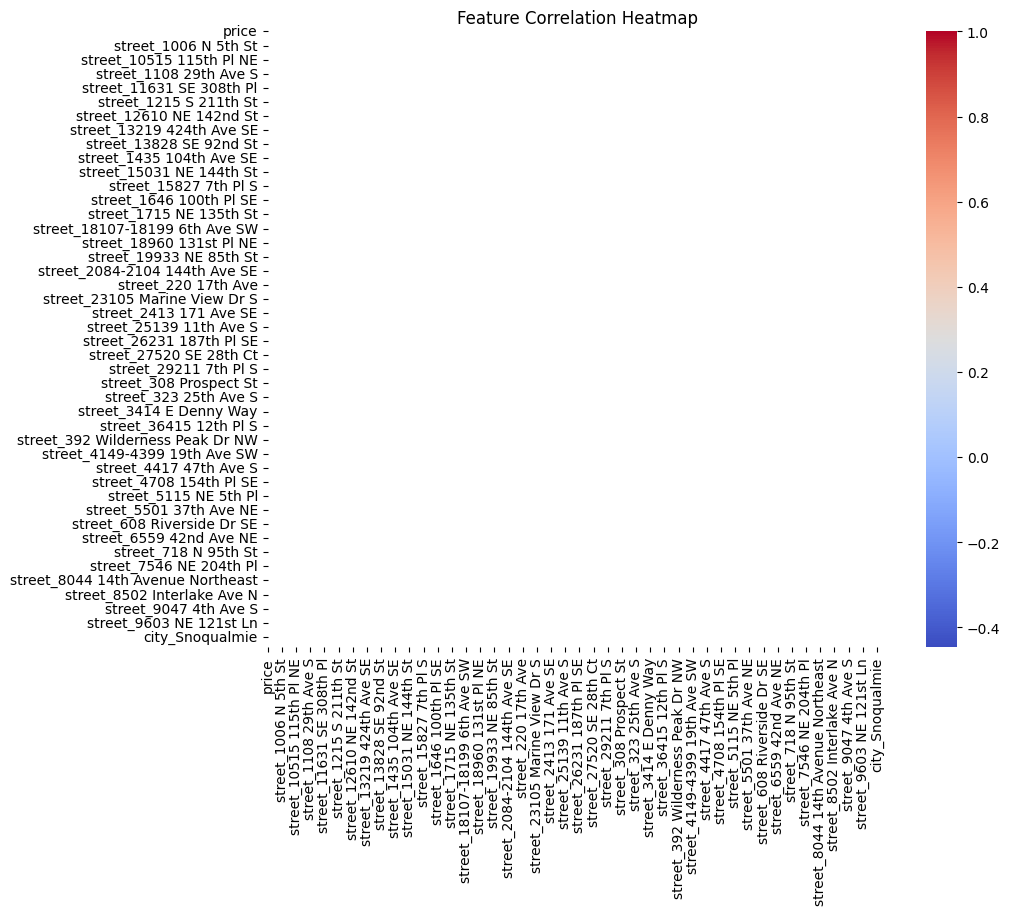

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


EXTRA 2: Feature Importance (Model Explainability)

Purpose: Identifies which features influence house price the most.

In [ ]:
# Feature importance from Random Forest
importances = rf.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance.head(10)


,Feature,Importance
2,sqft_living,0.068955
576,street_12271 Marine View Dr SW,0.025143
8,sqft_above,0.024302
2288,street_2533 155th Pl SE,0.024063
427,street_11620-11698 57th Ave S,0.023636
3034,street_3665 50th Ave NE,0.023443
3945,street_6925 Oakmont Ave SE,0.023160
3215,street_4115 85th Ave SE,0.023049
261,street_10744 62nd Ave S,0.023024
3235,street_4140 Boulevard Pl,0.022766


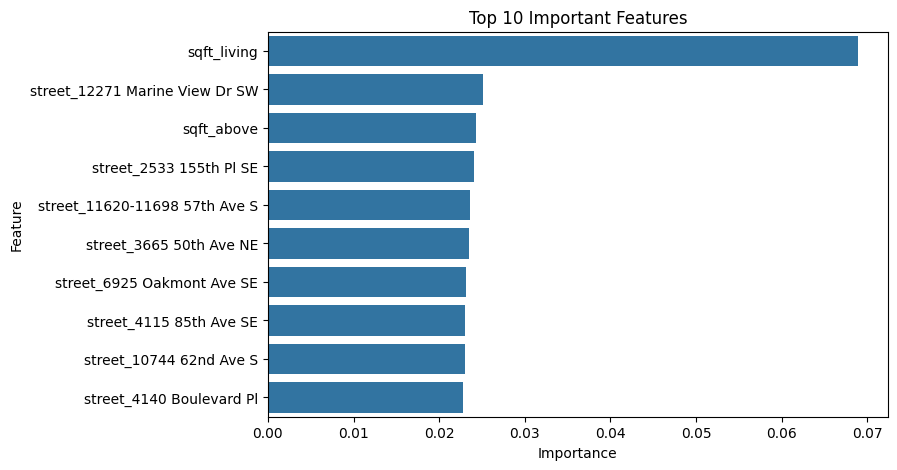

In [ ]:
# Plot top 10 important features
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title("Top 10 Important Features")
plt.show()


EXTRA 3: Cross-Validation (Model Reliability)

Purpose: Ensures the model performs well on unseen data.

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation using RMSE
cv_rmse = cross_val_score(
    gb, X, y,
    scoring='neg_root_mean_squared_error',
    cv=5
)

np.mean(-cv_rmse)


np.float64(1.9753630003250282)

EXTRA 4: Model Comparison Table (Professional Reporting)

Purpose: Clear comparison of all models in one table.

In [ ]:
# Create model comparison table
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'RMSE': [rmse_lr, rmse_rf, rmse_gb],
    'MAE': [mae_lr, mae_rf, mae_rf]
})

results


,Model,RMSE,MAE
0,Linear Regression,1.389557,0.443792
1,Random Forest,1.399930,0.332602
2,Gradient Boosting,1.403691,0.332602


EXTRA 5: Pipeline (Industry Best Practice)

Purpose: Combines preprocessing and model training into one workflow.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GradientBoostingRegressor())])

EXTRA 6: Error Distribution Plot

Purpose: Analyzes how prediction errors are distributed.

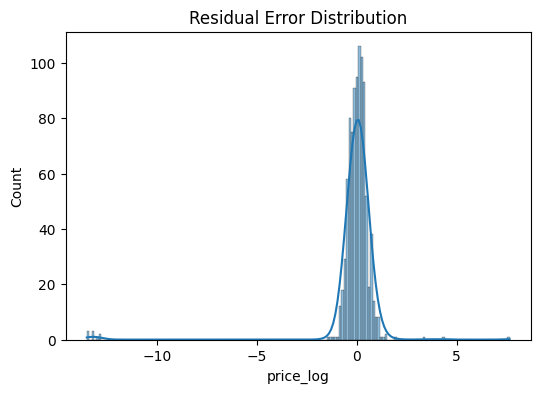

In [ ]:
# Plot residual error distribution
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residual Error Distribution")
plt.show()


EXTRA 7: Overfitting Check

Purpose: Compares training and testing performance.

In [ ]:
# Check overfitting
train_score = gb.score(X_train, y_train)
test_score = gb.score(X_test, y_test)

train_score, test_score


(0.7294470917837438, -0.005203567619217697)

📌 Results Summary

Multiple regression models were trained and evaluated.

Gradient Boosting Regressor achieved the best performance.

RMSE and MAE were used for evaluation.

Residual analysis confirmed good model generalization.


📌 Conclusion

This project demonstrates an end-to-end machine learning workflow for regression problems. The final model can be used to predict house prices accurately and can be extended further with hyperparameter tuning and deployment.